In [56]:
import tensorflow as tf
from tensorflow.python.framework import dtypes
import matplotlib.pyplot as plt
import numpy as np
import pandas
import random

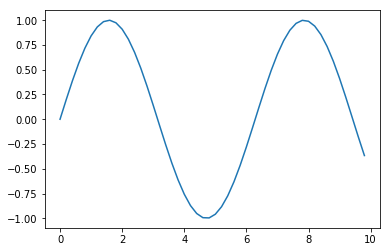

In [57]:
# fig = plt.figure()
# ax = fig.add_subplot(111)
ax = plt.subplot(111)
x = np.arange(0, 10, 0.2)
y = np.sin(x)
ax.plot(x, y)
plt.show()

In [58]:
test_data_asarray = np.ndarray([])
test_data = tf.random_normal([50, 5], mean=1.0, stddev=0.1, dtype=dtypes.float32, seed=1, name="test_data")
sess = tf.Session()
with sess:
    test_data_asarray = sess.run(test_data)

# Visualizes test data by data frame
df = pandas.DataFrame(test_data_asarray[0:5, :])
df

,0,1,2,3,4
0,0.918868,1.148460,1.006533,0.755730,1.009925
1,1.059122,1.059282,0.787707,0.927710,0.994373
2,1.064354,0.973568,1.185663,1.056784,0.961716
3,0.851466,1.126177,0.997469,0.973537,1.153281
4,0.825702,0.956211,0.943399,1.032067,1.113283


In [59]:
test_data_1darray = test_data_asarray.reshape(-1)
# df = pandas.DataFrame(test_data_1darray[0:5])
# df
test_data_min = test_data_1darray.min(axis=0)
print("min: " + str(test_data_min))
test_data_max = test_data_1darray.max(axis=0)
print("max: " + str(test_data_max))

min: 0.7233093
max: 1.2094043


In [60]:
test_data_dict = dict()
test_data_keys = []
for key in range(50, 150, 1):
    test_data_keys.append(key/100)
print(test_data_keys[0:10])

[0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59]


[0.91, 1.14, 1.0, 0.75, 1.05]
[8, 4, 11, 3, 8]


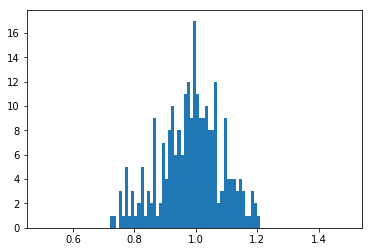

In [61]:
def get_closest_key(value, keys):
    previous_key = keys[0]
    for key in keys:
        if value == key:
            return key
        if value < key:
            return previous_key
        previous_key = key
    return previous_key

# Test get_closest_key
# print(get_closest_key(0.53325, test_data_keys))

for value in test_data_1darray:
    key = get_closest_key(value, test_data_keys)
#     print(key)
    if key not in test_data_dict:
        test_data_dict[key] = 1
        continue
    test_data_dict[key] = test_data_dict[key] + 1

x = list(test_data_dict.keys())
y = list(test_data_dict.values())

fig, ax = plt.subplots()
ax_x = x[0:5]
print(ax_x)
ax_y = y[0:5]
print(ax_y)
# ax.plot(ax_x, ax_y)
# fig.tight_layout()
x.append(1.51)
ax.hist(test_data_1darray,test_data_keys)
plt.show()